In [70]:
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
from scipy import stats
from vars import abs_path
import os

In [71]:
data = pd.read_csv("data.csv")
data = data.rename(columns={"Позначка часу": "time", "Ім'я користувача": "email", "Ваша стать?": "sex", "Ваш вік?":"age", "Чи є ви дійсним громадянином / громадянкою України?":"is_citizen", "З якого ви регіону України? (дуже умовний поділ, можете обрати два варіанти)":"region", "Чи проживаєте ви зараз на території України?":"where_live", "Наскільки часто ви використовували російську мову в повсякденному житті ДО початку повномасштабного вторгнення?":"lang_before", "Наскільки часто ви використовуєте російську мову в повсякденному житті зараз?":"lang_after", "Переглядаючи зарубіжний контент онлайн (фільми, серіали і тд), озвучку якою мовою ви використовували в більшості випадків ДО початку повномасштабного вторгнення? (можна обирати кілька варіантів)":"movies_before", "Переглядаючи зарубіжний контент онлайн (фільми, серіали і тд), озвучку якою мовою ви використовуєте зараз? (можна обирати кілька варіантів)":"movies_after", "Наскільки часто ви споживали контент російських авторів ДО початку повномасштабного вторшнення? (музика, фільми, ютуб канали, сторінки в соціальних мережах і тд)":"content_before", "Наскільки часто ви споживаєте контент російських авторів зараз? (музика, фільми, ютуб канали, сторінки в соціальних мережах і тд)":"content_after", "Маєте коментарі щодо опитування? Лишайте їх тут!":"comments"})
data["sex"] = data["sex"].replace(['Чоловіча'], 'Male')
data["sex"] = data["sex"].replace(['Жіноча'], 'Female')
data["sex"] = data["sex"].replace(["Чоловік з тілом жінки"], 'NB')
data["sex"] = data["sex"].replace(['Небінарна'], 'NB')
data["is_citizen"] = data["is_citizen"].replace(['Так'], 'yes')
data = data[data["is_citizen"] == "yes"]

data["region"] = data["region"].str.split(";")


data["movies_before"] = data["movies_before"].str.split(";")
data["movies_after"] = data["movies_after"].str.split(";")
    
for _ in range (len(data)):
    for i in range(len(data["region"].iloc[_])):
        if data["region"].iloc[_][i] == "Центральна/Північна Україна":
            data["region"].iloc[_][i] = "Сentral-north"
        elif data["region"].iloc[_][i] == "Західна Україна":
            data["region"].iloc[_][i] = "West"
        elif data["region"].iloc[_][i] == "Східна Україна":
            data["region"].iloc[_][i] = "East"
        elif data["region"].iloc[_][i] == "Південна Україна":
            data["region"].iloc[_][i] = "South"

    for i in range(len(data["movies_before"].iloc[_])):
        if data["movies_before"].iloc[_][i] == "Українською":
            data["movies_before"].iloc[_][i] = "Ukrainian"
        elif data["movies_before"].iloc[_][i] == "Англійською":
            data["movies_before"].iloc[_][i] = "English"
        elif data["movies_before"].iloc[_][i] == "Російською":
            data["movies_before"].iloc[_][i] = "russian"
        else: data["movies_before"].iloc[_][i] = "other"
            
    for i in range(len(data["movies_after"].iloc[_])):
        if data["movies_after"].iloc[_][i] == "Українською":
            data["movies_after"].iloc[_][i] = "Ukrainian"
        elif data["movies_after"].iloc[_][i] == "Англійською":
            data["movies_after"].iloc[_][i] = "English"
        elif data["movies_after"].iloc[_][i] == "Російською":
            data["movies_after"].iloc[_][i] = "russian"
        else: data["movies_after"].iloc[_][i] = "other"

data["where_live"] = data["where_live"].replace(['Ні, тимчасово закордоном'], 'temp_abroad')
data["where_live"] = data["where_live"].replace(['Ні, навряд чи повернусь жити в Україну'], 'perm_abroad')
data["where_live"] = data["where_live"].replace(['Так'], 'in_Ukraine')

data["lang_before"] = data["lang_before"].replace(['Ніколи'], 1)
data["lang_before"] = data["lang_before"].replace(['Дуже рідко'], 2)
data["lang_before"] = data["lang_before"].replace(['Доволі часто'], 3)
data["lang_before"] = data["lang_before"].replace(['У більшості випадків'], 4)
data["lang_before"] = data["lang_before"].replace(['Завжди'], 5)

data["lang_after"] = data["lang_after"].replace(['Ніколи'], 1)
data["lang_after"] = data["lang_after"].replace(['Дуже рідко'], 2)
data["lang_after"] = data["lang_after"].replace(['Доволі часто'], 3)
data["lang_after"] = data["lang_after"].replace(['У більшості випадків'], 4)
data["lang_after"] = data["lang_after"].replace(['Завжди'], 5)

data["content_before"] = data["content_before"].replace(['Ніколи'], 1)
data["content_before"] = data["content_before"].replace(['Дуже рідко'], 2)
data["content_before"] = data["content_before"].replace(['Доволі часто'], 3)
data["content_before"] = data["content_before"].replace(['У більшості випадків'], 4)
data["content_before"] = data["content_before"].replace(['Завжди'], 5)

data["content_after"] = data["content_after"].replace(['Ніколи'], 1)
data["content_after"] = data["content_after"].replace(['Дуже рідко'], 2)
data["content_after"] = data["content_after"].replace(['Доволі часто'], 3)
data["content_after"] = data["content_after"].replace(['У більшості випадків'], 4)
data["content_after"] = data["content_after"].replace(['Завжди'], 5)

data = data.explode("region")

In [72]:
data = data.drop(columns=["email", "comments"])
data.to_csv("final_dataset.csv")

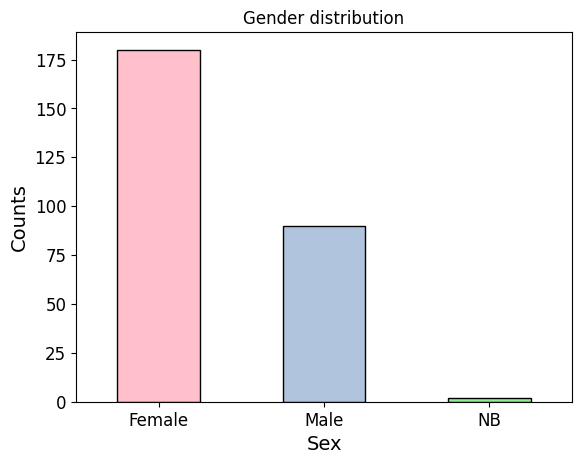

In [73]:
# plot for gender distribution
counts = data['sex'].value_counts()

bar_colors = ['pink', 'lightsteelblue', "lightgreen"]
edge_color = 'black'
x_label = 'Sex'
y_label = 'Counts'
title = 'Gender distribution'
tick_label_font_size = 12

ax = counts.plot(kind='bar', color=bar_colors, edgecolor=edge_color)
ax.set_xlabel(x_label, fontsize=14)
ax.set_ylabel(y_label, fontsize=14)
ax.set_title(title)

ax.tick_params(axis='both', labelsize=tick_label_font_size)
plt.xticks(rotation=0)

plt.savefig(os.path.join(abs_path, "plots/gender_plot.png"), transparent=True)
plt.show()

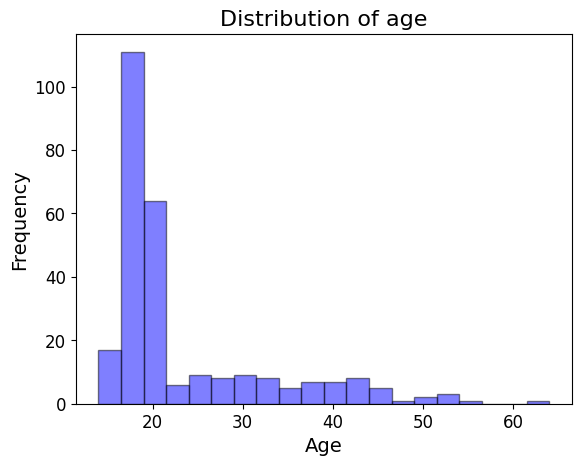

In [74]:
# plot for age distribution

counts_age = data['age']

bin_count = 20
bar_color = 'blue'
bar_alpha = 0.5
edge_color = 'black'
x_label = 'Age'
y_label = 'Frequency'
title = 'Distribution of age'

ax = counts_age.plot(kind='hist', bins=bin_count, color=bar_color, alpha=bar_alpha, edgecolor=edge_color)
ax.set_xlabel(x_label, fontsize=14)
ax.set_ylabel(y_label, fontsize=14)
ax.set_title(title, fontsize=16)
ax.tick_params(axis='both', labelsize=12)

plt.savefig(os.path.join(abs_path, "plots/age_plot.png"), transparent=True)
plt.show()


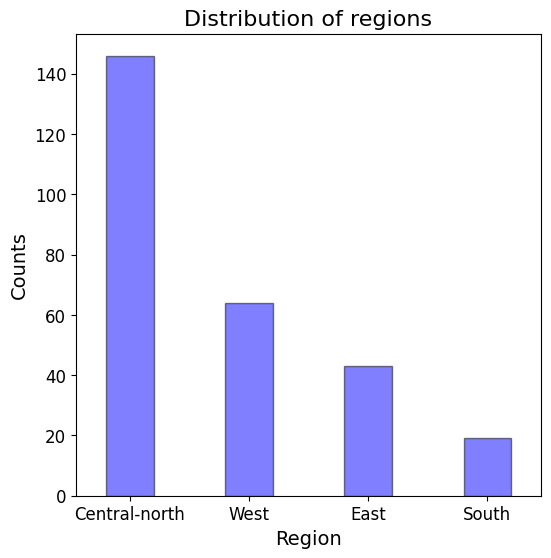

In [75]:
# plot for region distribution

counts_region = data['region'].value_counts()

fig_size = (6, 6)
bar_color = 'blue'
bar_alpha = 0.5
edge_color = 'black'
bar_width = 0.4
x_label = 'Region'
y_label = 'Counts'
title = 'Distribution of regions'

fig, ax = plt.subplots(figsize=fig_size)
counts_region.plot(kind='bar', color=bar_color, alpha=bar_alpha, edgecolor=edge_color, width=bar_width, ax=ax)

ax.set_xlabel(x_label, fontsize=14)
ax.set_ylabel(y_label, fontsize=14)
ax.set_title(title, fontsize=16)
ax.tick_params(axis='both', labelsize=12)

plt.xticks(rotation=0)
plt.savefig(os.path.join(abs_path, "plots/regions_plot.png"), transparent=True)
plt.show()



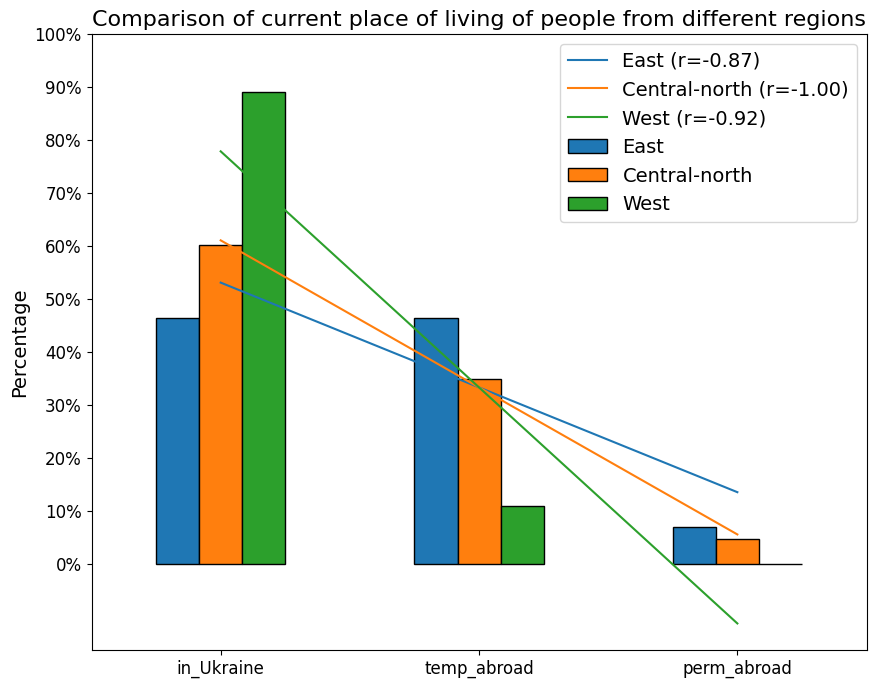

p_value = 0.26150321888661476


In [76]:
from matplotlib.ticker import FixedLocator
#This plot represents current places of living of people from different regions

regions = ['East', 'Сentral-north', 'West']
df_list = [data[data['region'] == region] for region in regions]

# Calculate the proportion of where_live values in each region
proportions = [df['where_live'].value_counts() / len(df) for df in df_list]

# Combine the proportions into a single dataframe and fill missing values with 0
compare_df = pd.concat(proportions, axis=1, keys=regions).fillna(0)
compare_df = compare_df.reindex(index=["in_Ukraine", "temp_abroad", "perm_abroad"])

bar_edge_color = 'black'
y_label = 'Percentage'
title = 'Comparison of current place of living of people from different regions'
tick_label_font_size = 12

ax = compare_df.plot(kind='bar', figsize=(10, 8), edgecolor=bar_edge_color)
ax.set_ylabel(y_label, fontsize=14)
ax.set_title(title, fontsize=16)

# Add linear regressions for each column
x = np.arange(len(compare_df.index))
for i, column in enumerate(compare_df.columns):
    y = compare_df[column].values
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    plt.plot(x, slope * x + intercept, color='C{}'.format(i), label='{} (r={:.2f})'.format(column, r_value))

# Configure tick labels
ax.set_xticklabels(compare_df.index, rotation=0, fontsize=tick_label_font_size)
ax.yaxis.set_major_locator(FixedLocator(np.arange(0, 1.1, 0.1)))
ax.set_yticklabels(['{:.0f}%'.format(y * 100) for y in np.arange(0, 1.1, 0.1)], fontsize=tick_label_font_size)
plt.yticks(np.arange(0, 1.1, 0.1))
ax.legend(fontsize=14)

plt.savefig(os.path.join(abs_path, "plots/regions_place_of_living.png"), transparent=True)
plt.show()
print("p_value =", p_value)


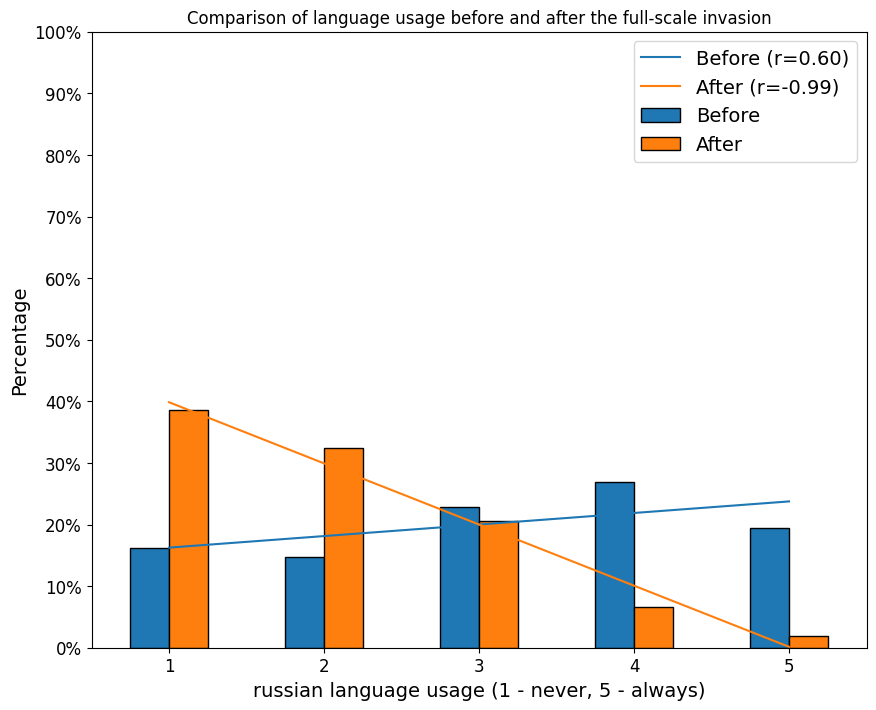

p_value = 0.0014345853957940214


In [77]:
# plot for general russian language usage

compare_df = pd.DataFrame({'Before': data['lang_before'].value_counts(),
                           'After': data['lang_after'].value_counts()})
compare_df["Before"] /= len(data['lang_before'])
compare_df["After"] /= len(data['lang_after'])

# plot settings
fig, ax = plt.subplots(figsize=(10, 8))
bar_colors = ['C0', 'C1']
edge_color = 'black'
x_label = 'russian language usage (1 - never, 5 - always)'
y_label = 'Percentage'
title = 'Comparison of language usage before and after the full-scale invasion'
tick_label_font_size = 12

compare_df.plot(kind='bar', ax=ax, color=bar_colors, edgecolor=edge_color)

# add linear regressions and metrics for each column
x = np.arange(len(compare_df.index))
for i, column in enumerate(compare_df.columns):
    y = compare_df[column].values
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    ax.plot(x, slope * x + intercept, label='{} (r={:.2f})'.format(column, r_value))

ax.set_xlabel(x_label, fontsize=14)
ax.set_ylabel(y_label, fontsize=14)
ax.set_title(title)
ax.set_xticks(x)
ax.set_xticklabels(compare_df.index, fontsize=tick_label_font_size, rotation=0)
ax.set_yticks(np.arange(0, 1.1, 0.1))
ax.set_yticklabels(['{:.0f}%'.format(y * 100) for y in np.arange(0, 1.1, 0.1)], fontsize=tick_label_font_size)
ax.legend(fontsize=14)

plt.savefig(os.path.join(abs_path, "plots/language_before_and_after.png"), transparent=True)
plt.show()

print("p_value =", p_value)


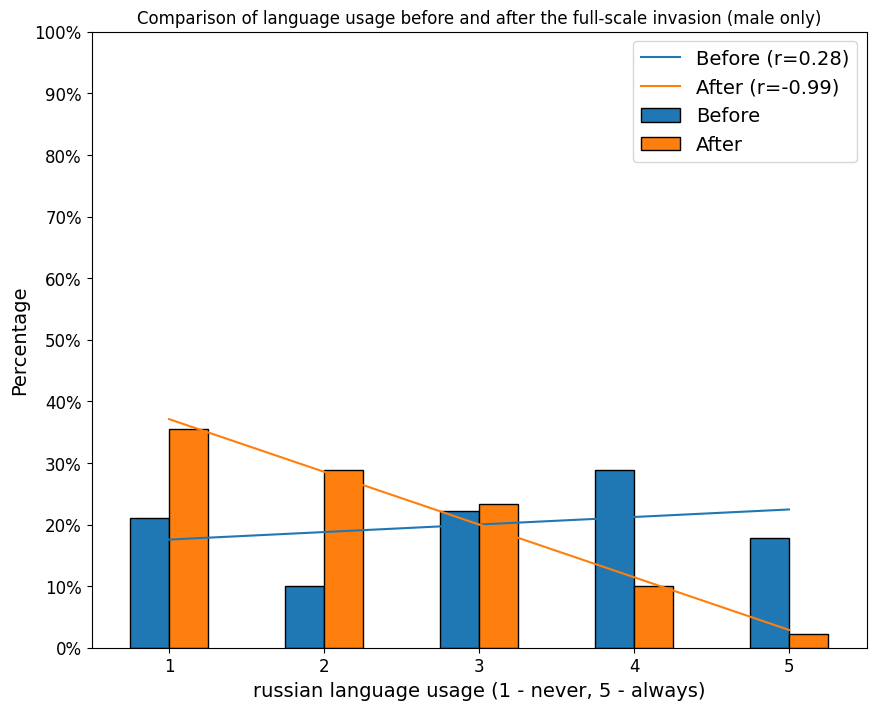

p_value = 0.0013577728124155761


In [78]:
# plot for male only
data_male = data[data["sex"] == "Male"]

compare_df = pd.DataFrame({'Before': data_male['lang_before'].value_counts(),
                           'After': data_male['lang_after'].value_counts()})
compare_df["Before"] /= len(data_male['lang_before'])
compare_df["After"] /= len(data_male['lang_after'])

fig, ax = plt.subplots(figsize=(10, 8))
bar_colors = ['C0', 'C1']
edge_color = 'black'
x_label = 'russian language usage (1 - never, 5 - always)'
y_label = 'Percentage'
title = 'Comparison of language usage before and after the full-scale invasion (male only)'
tick_label_font_size = 12

compare_df.plot(kind='bar', ax=ax, color=bar_colors, edgecolor=edge_color)

x = np.arange(len(compare_df.index))
for i, column in enumerate(compare_df.columns):
    y = compare_df[column].values
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    ax.plot(x, slope * x + intercept, label='{} (r={:.2f})'.format(column, r_value))

ax.set_xlabel(x_label, fontsize=14)
ax.set_ylabel(y_label, fontsize=14)
ax.set_title(title)

ax.set_xticks(x)
ax.set_xticklabels(compare_df.index, fontsize=tick_label_font_size, rotation=0)
ax.set_yticks(np.arange(0, 1.1, 0.1))
ax.set_yticklabels(['{:.0f}%'.format(y * 100) for y in np.arange(0, 1.1, 0.1)], fontsize=tick_label_font_size)
ax.legend(fontsize=14)

plt.savefig(os.path.join(abs_path, "plots/language_before_and_after_male.png"), transparent=True)
plt.show()

print("p_value =", p_value)


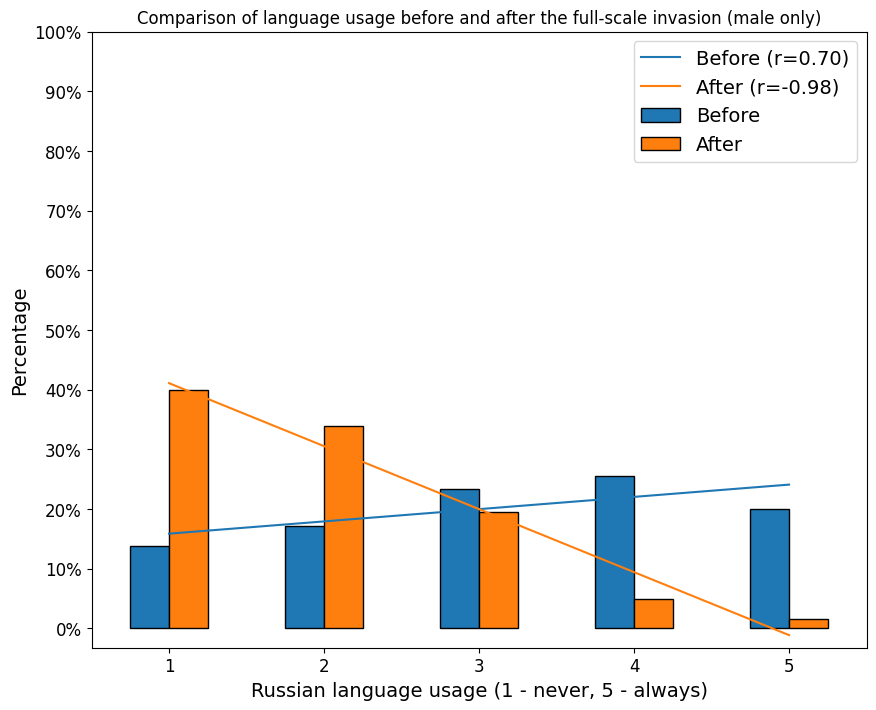

p_value = 0.0027796310764785187


In [79]:
# plot for female only
data_male = data[data["sex"] == "Female"]

compare_df = pd.DataFrame({'Before': data_male['lang_before'].value_counts(),
                           'After': data_male['lang_after'].value_counts()})
compare_df["Before"] /= len(data_male['lang_before'])
compare_df["After"] /= len(data_male['lang_after'])

fig, ax = plt.subplots(figsize=(10, 8))
bar_colors = ['C0', 'C1']
edge_color = 'black'
x_label = 'Russian language usage (1 - never, 5 - always)'
y_label = 'Percentage'
title = 'Comparison of language usage before and after the full-scale invasion (male only)'
tick_label_font_size = 12

compare_df.plot(kind='bar', ax=ax, color=bar_colors, edgecolor=edge_color)

x = np.arange(len(compare_df.index))
for i, column in enumerate(compare_df.columns):
    y = compare_df[column].values
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    ax.plot(x, slope * x + intercept, label='{} (r={:.2f})'.format(column, r_value))

ax.set_xlabel(x_label, fontsize=14)
ax.set_ylabel(y_label, fontsize=14)
ax.set_title(title)

ax.set_xticks(x)
ax.set_xticklabels(compare_df.index, fontsize=tick_label_font_size, rotation=0)
ax.set_yticks(np.arange(0, 1.1, 0.1))
ax.set_yticklabels(['{:.0f}%'.format(y * 100) for y in np.arange(0, 1.1, 0.1)], fontsize=tick_label_font_size)
ax.legend(fontsize=14)

plt.savefig(os.path.join(abs_path, "plots/language_before_and_after_female.png"), transparent=True)
plt.show()

print("p_value =", p_value)

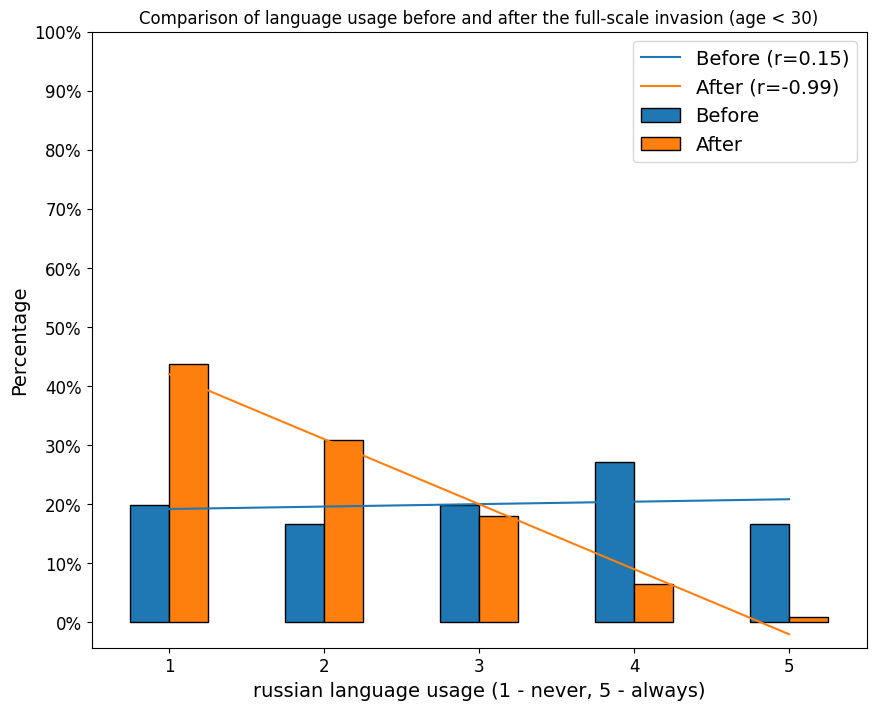

p_value = 0.0010363165911304092


In [80]:
# plot for less that 30 years
data_younger = data[data["age"] < 30]

compare_df = pd.DataFrame({'Before': data_younger['lang_before'].value_counts(),
                           'After': data_younger['lang_after'].value_counts()})
compare_df["Before"] /= len(data_younger['lang_before'])
compare_df["After"] /= len(data_younger['lang_after'])

fig, ax = plt.subplots(figsize=(10, 8))
bar_colors = ['C0', 'C1']
edge_color = 'black'
x_label = 'russian language usage (1 - never, 5 - always)'
y_label = 'Percentage'
title = 'Comparison of language usage before and after the full-scale invasion (age < 30)'
tick_label_font_size = 12

compare_df.plot(kind='bar', ax=ax, color=bar_colors, edgecolor=edge_color)

x = np.arange(len(compare_df.index))
for i, column in enumerate(compare_df.columns):
    y = compare_df[column].values
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    ax.plot(x, slope * x + intercept, label='{} (r={:.2f})'.format(column, r_value))

ax.set_xlabel(x_label, fontsize=14)
ax.set_ylabel(y_label, fontsize=14)
ax.set_title(title)

ax.set_xticks(x)
ax.set_xticklabels(compare_df.index, fontsize=tick_label_font_size, rotation=0)
ax.set_yticks(np.arange(0, 1.1, 0.1))
ax.set_yticklabels(['{:.0f}%'.format(y * 100) for y in np.arange(0, 1.1, 0.1)], fontsize=tick_label_font_size)
ax.legend(fontsize=14)

plt.savefig(os.path.join(abs_path, "plots/language_before_after_less_than_30.png"), transparent=True)
plt.show()

print("p_value =", p_value)


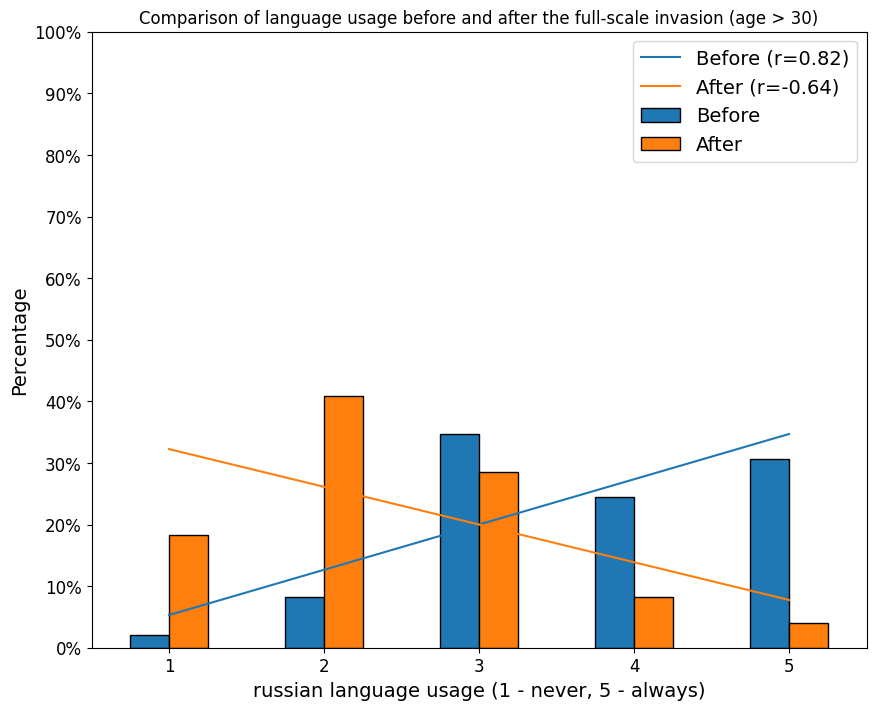

p_value = 0.24060257955292738


In [81]:
# plot for more that 30 years
data_older = data[data["age"] > 30]

compare_df = pd.DataFrame({'Before': data_older['lang_before'].value_counts(),
                           'After': data_older['lang_after'].value_counts()})
compare_df["Before"] /= len(data_older['lang_before'])
compare_df["After"] /= len(data_older['lang_after'])

fig, ax = plt.subplots(figsize=(10, 8))
bar_colors = ['C0', 'C1']
edge_color = 'black'
x_label = 'russian language usage (1 - never, 5 - always)'
y_label = 'Percentage'
title = 'Comparison of language usage before and after the full-scale invasion (age > 30)'
tick_label_font_size = 12

compare_df.plot(kind='bar', ax=ax, color=bar_colors, edgecolor=edge_color)

x = np.arange(len(compare_df.index))
for i, column in enumerate(compare_df.columns):
    y = compare_df[column].values
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    ax.plot(x, slope * x + intercept, label='{} (r={:.2f})'.format(column, r_value))

ax.set_xlabel(x_label, fontsize=14)
ax.set_ylabel(y_label, fontsize=14)
ax.set_title(title)

ax.set_xticks(x)
ax.set_xticklabels(compare_df.index, fontsize=tick_label_font_size, rotation=0)
ax.set_yticks(np.arange(0, 1.1, 0.1))
ax.set_yticklabels(['{:.0f}%'.format(y * 100) for y in np.arange(0, 1.1, 0.1)], fontsize=tick_label_font_size)
ax.legend(fontsize=14)

plt.savefig(os.path.join(abs_path, "plots/language_before_after_more_than_30.png"), transparent=True)
plt.show()

print("p_value =", p_value)


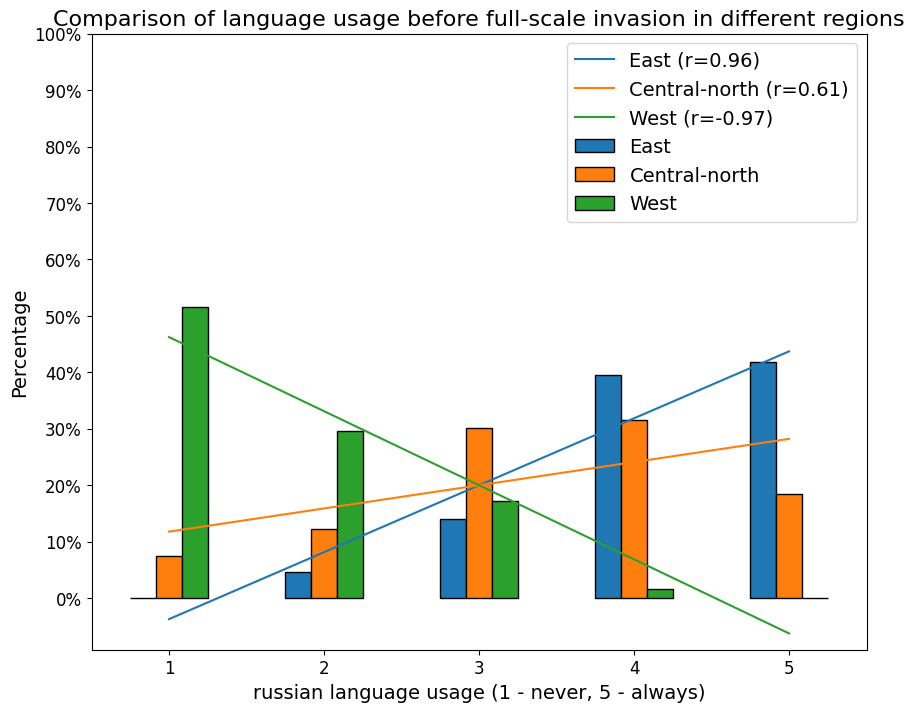

p_value = 0.006792915955299335


In [82]:
# This plot represents usage of russian language in general in different regions BEFORE the full-scale invasion


df_east = data[data["region"] == "East"]
df_center = data[data["region"] == "Сentral-north"]
df_west = data[data["region"] == "West"]

compare_df = pd.DataFrame({'East': df_east['lang_before'].value_counts(),
                           'Сentral-north': df_center['lang_before'].value_counts(),
                           'West': df_west['lang_before'].value_counts()})
compare_df.fillna(value=0, inplace=True)
compare_df["East"] /= len(df_east)
compare_df["Сentral-north"] /= len(df_center)
compare_df["West"] /= len(df_west)

fig, ax = plt.subplots(figsize=(10, 8))
bar_colors = ['C0', 'C1', 'C2']
edge_color = 'black'
x_label = 'russian language usage (1 - never, 5 - always)'
y_label = 'Percentage'
title = 'Comparison of language usage before full-scale invasion in different regions'
tick_label_font_size = 12

compare_df.plot(kind='bar', ax=ax, color=bar_colors, edgecolor=edge_color)

x = np.arange(len(compare_df.index))
for i, column in enumerate(compare_df.columns):
    y = compare_df[column].values
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    ax.plot(x, slope * x + intercept, label='{} (r={:.2f})'.format(column, r_value))

ax.set_xlabel(x_label, fontsize=14)
ax.set_ylabel(y_label, fontsize=14)
ax.set_title(title, fontsize=16)

ax.set_xticks(x)
ax.set_xticklabels(compare_df.index, fontsize=tick_label_font_size, rotation=0)
ax.set_yticks(np.arange(0, 1.1, 0.1))
ax.set_yticklabels(['{:.0f}%'.format(y * 100) for y in np.arange(0, 1.1, 0.1)], fontsize=tick_label_font_size)
ax.legend(fontsize=14)

plt.savefig(os.path.join(abs_path, "plots/regions_language_before.png"), transparent=True)
plt.show()

print("p_value =", p_value)

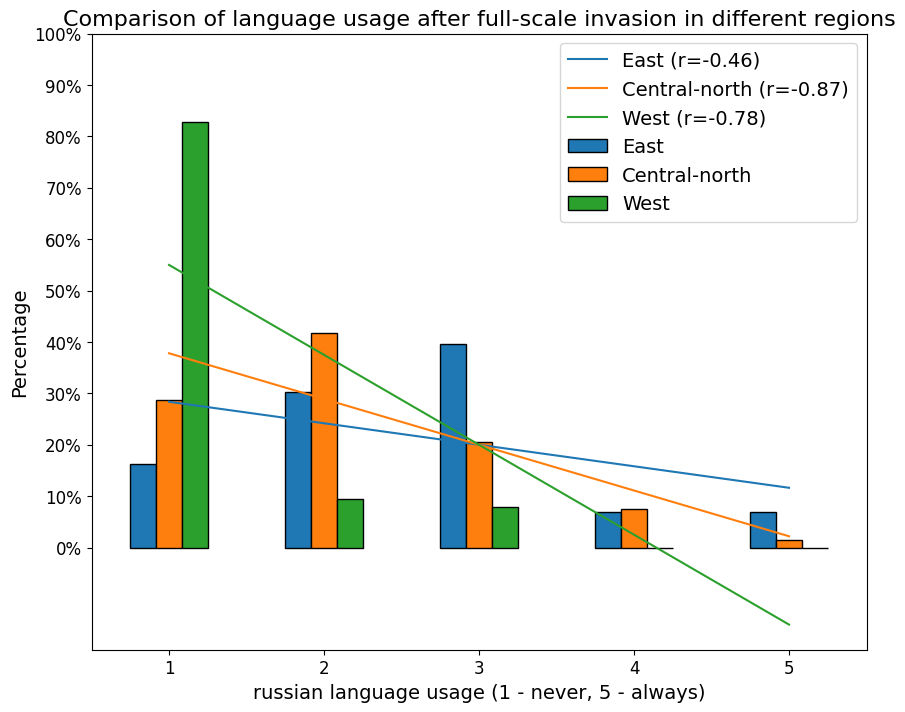

p_value = 0.11803758556047042


In [83]:
# This plot represents usage of russian language in general in different regions AFTER the full-scale invasion 


df_east = data[data["region"] == "East"]
df_center = data[data["region"] == "Сentral-north"]
df_west = data[data["region"] == "West"]

compare_df = pd.DataFrame({'East': df_east['lang_after'].value_counts(),
                           'Сentral-north': df_center['lang_after'].value_counts(),
                           'West': df_west['lang_after'].value_counts()})
compare_df.fillna(value=0, inplace=True)
compare_df["East"] /= len(df_east)
compare_df["Сentral-north"] /= len(df_center)
compare_df["West"] /= len(df_west)

fig, ax = plt.subplots(figsize=(10, 8))
bar_colors = ['C0', 'C1', 'C2']
edge_color = 'black'
x_label = 'russian language usage (1 - never, 5 - always)'
y_label = 'Percentage'
title = 'Comparison of language usage after full-scale invasion in different regions'
tick_label_font_size = 12

compare_df.plot(kind='bar', ax=ax, color=bar_colors, edgecolor=edge_color)

x = np.arange(len(compare_df.index))
for i, column in enumerate(compare_df.columns):
    y = compare_df[column].values
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    ax.plot(x, slope * x + intercept, label='{} (r={:.2f})'.format(column, r_value))

ax.set_xlabel(x_label, fontsize=14)
ax.set_ylabel(y_label, fontsize=14)
ax.set_title(title, fontsize=16)

ax.set_xticks(x)
ax.set_xticklabels(compare_df.index, fontsize=tick_label_font_size, rotation=0)
ax.set_yticks(np.arange(0, 1.1, 0.1))
ax.set_yticklabels(['{:.0f}%'.format(y * 100) for y in np.arange(0, 1.1, 0.1)], fontsize=tick_label_font_size)
ax.legend(fontsize=14)

plt.savefig(os.path.join(abs_path, "plots/regions_language_after.png"), transparent=True)
plt.show()

print("p_value =", p_value)


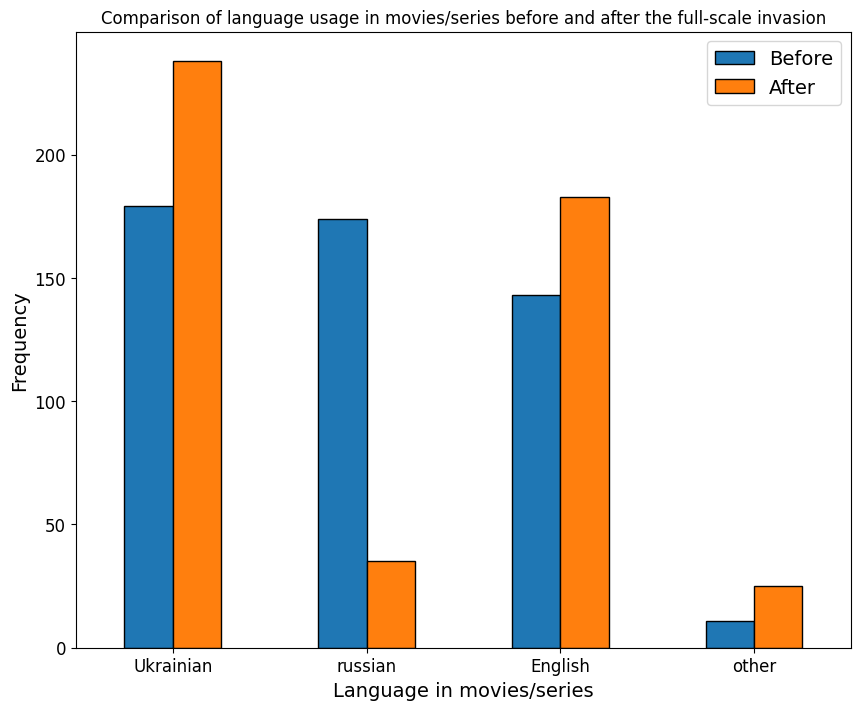

p_value = 0.11803758556047042


In [85]:
# plot for languages in movies before and after 

compare_df = pd.DataFrame({'Before': pd.Series(np.concatenate(data["movies_before"].values)).value_counts(),
                           'After': pd.Series(np.concatenate(data["movies_after"].values)).value_counts()})
compare_df = compare_df.reindex(index=["Ukrainian", "russian", "English", "other"])

compare_df.plot(kind='bar', figsize=(10, 8), edgecolor='black')

plt.xlabel('Language in movies/series', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Comparison of language usage in movies/series before and after the full-scale invasion')

x = np.arange(len(compare_df.index))  # Redefine x for this plot
plt.xticks(x, compare_df.index, fontsize=12, rotation=0)
plt.yticks(fontsize=12)
plt.legend(fontsize=14)

plt.savefig(os.path.join(abs_path, "plots/movies_before_and_after.png"), transparent=True)
plt.show()
print("p_value =", p_value)



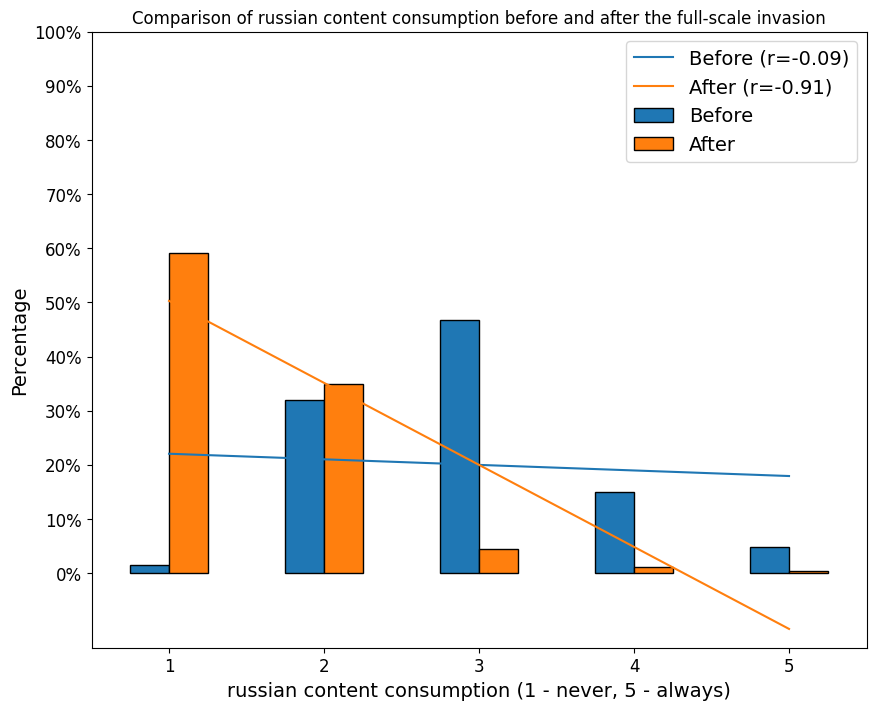

p_value = 0.029697884041761893


In [86]:
# plot for russian content before and after 

compare_df = pd.DataFrame({'Before': data['content_before'].value_counts(),
                           'After': data['content_after'].value_counts()})
compare_df["Before"] = compare_df["Before"] / len(data['content_before'])
compare_df["After"] = compare_df["After"] / len(data['content_after'])

compare_df.plot(kind='bar', figsize=(10, 8), edgecolor='black')

x = np.arange(len(compare_df.index))
for i, column in enumerate(compare_df.columns):
    y = compare_df[column].values
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    plt.plot(x, slope * x + intercept, color='C{}'.format(i), label='{} (r={:.2f})'.format(column, r_value))

plt.xlabel('russian content consumption (1 - never, 5 - always)', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.title('Comparison of russian content consumption before and after the full-scale invasion')

plt.xticks(x, compare_df.index, fontsize=12, rotation=0)
plt.yticks(np.arange(0, 1.1, 0.1), ['{:.0f}%'.format(y * 100) for y in np.arange(0, 1.1, 0.1)], fontsize=12)
plt.legend(fontsize=14)

plt.savefig(os.path.join(abs_path, "plots/content_before_and_after.png"), transparent=True)
plt.show()
print("p_value =", p_value)


In [87]:
# import scipy.stats as stats
# import pandas as pd

# # extract data for 'lang_before' and 'lang_after' columns for the two groups 'Male' and 'Female'
# male_before = data[data["sex"] == "Male"]['lang_before'].values
# female_before = data[data["sex"] == "Female"]['lang_before'].values
# male_after = data[data["sex"] == "Male"]['lang_after'].values
# female_after = data[data["sex"] == "Female"]['lang_after'].values

# # calculate the p-value and F-value for 'lang_before' column
# f_value_before, p_value_before = stats.f_oneway(male_before, female_before)
# print("F-value for lang_before: ", f_value_before)
# print("p-value for lang_before: ", p_value_before)

# # calculate the p-value and F-value for 'lang_after' column
# f_value_after, p_value_after = stats.f_oneway(male_after, female_after)
# print("F-value for lang_after: ", f_value_after)
# print("p-value for lang_after: ", p_value_after)
